In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [156]:
# Load the data
insurance_data = pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **A**

In [157]:
# Summarizing the data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [158]:
# Check how much data is present
insurance_data.shape

(1338, 7)

In [159]:
# Categorical attributes
categorical = insurance_data.dtypes[insurance_data.dtypes == 'object']
categorical

sex       object
smoker    object
region    object
dtype: object

In [160]:
# Continuous attributes
continuous = insurance_data.dtypes[insurance_data.dtypes != 'object']
continuous

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

# **B**

In [161]:
# Statistical values of attributes
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


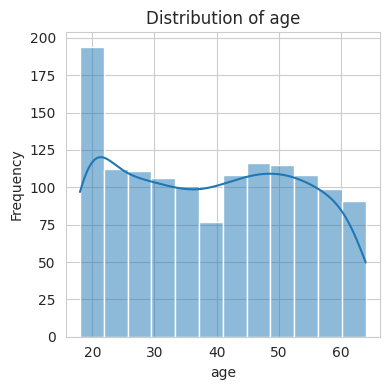

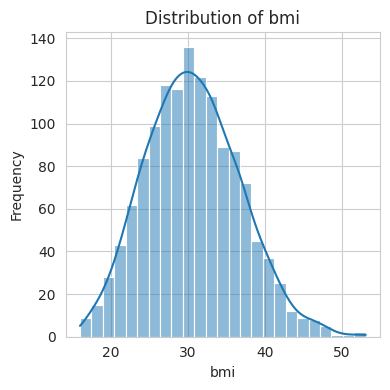

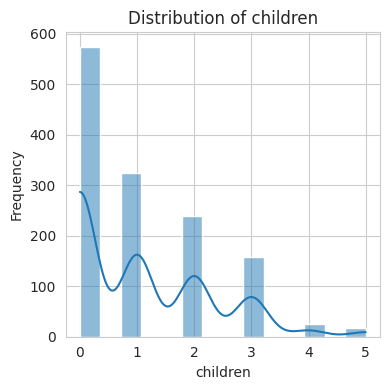

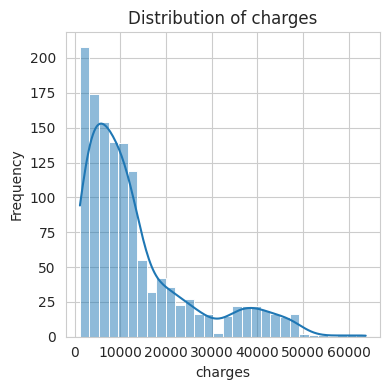

In [162]:
# Distribution of attributes

# Take numeric columns
continuous = insurance_data.select_dtypes(include=['float64', 'int64'])

# Plot histogram
for column in continuous.columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(data=insurance_data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

From the histogram of charges, we can say that the graph is right skewed that is most of the charges are within 30000.

In [163]:
# Noticeable traits

# Check missing values
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

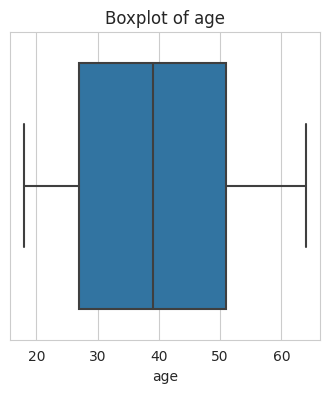

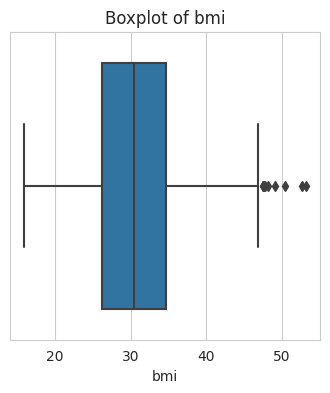

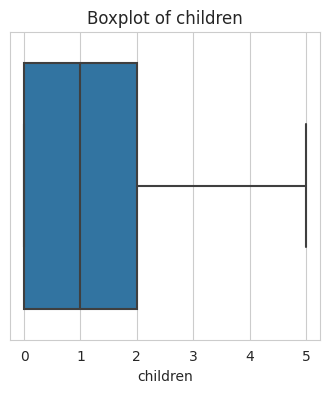

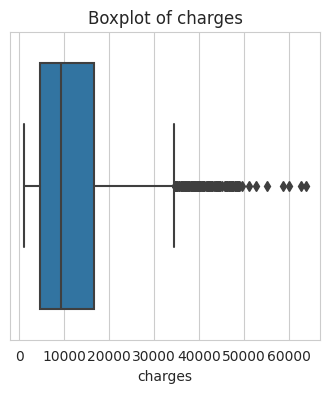

In [164]:
# Check outliers
# Plot boxplot
for column in continuous.columns:
  plt.figure(figsize=(4, 4))
  sns.boxplot(data=insurance_data, x=column)
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)
  plt.show()

There are no missing values in the dataset.

From the boxplots, we can see that the attributes, bmi and charges have outliers.
Compared to bmi, charges column has more number of outliers.

We can either remove the outliers or use standardized scaling.

# **C**

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


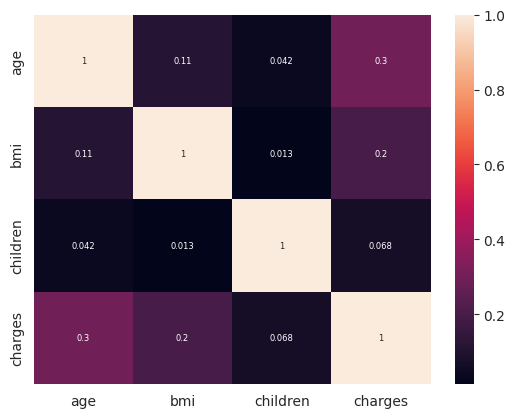

In [165]:
# Compute Pearson Correlation Coefficient (PCC) for numeric attributes
correlations = insurance_data.corr(numeric_only=True)
sns.heatmap(insurance_data.corr(), annot = True, annot_kws={"size": 6});
correlations

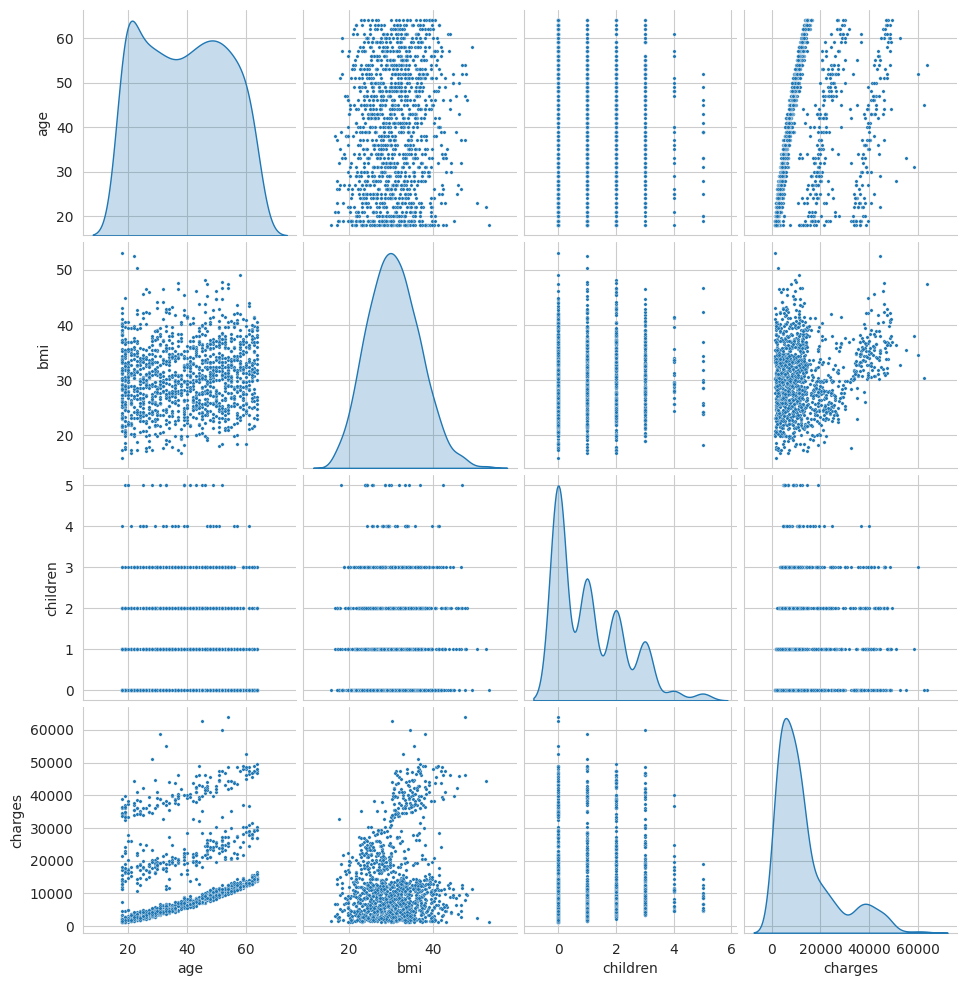

In [166]:
# Scattterplot
sns.set_style("whitegrid")
sns.pairplot(insurance_data, diag_kind="kde", markers="o", plot_kws={"s": 6})
plt.show()

From the scatterplot we observe that,
Most of the people of age group 18 to 62 take insurance.

The people who take insurance mostly have no children or upto 3 children.


In [167]:
# Copy the dataset to df
df = insurance_data.copy()

In [168]:
# One-hot encoding for categorical attributes
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [169]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


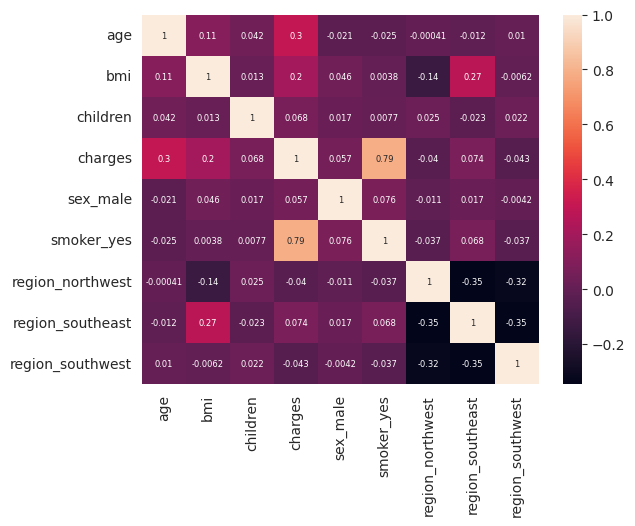

In [170]:
# Compute Pearson Correlation Coefficient (PCC)
correlations = df.corr(numeric_only=True)
sns.heatmap(df.corr(), annot = True, annot_kws={"size": 6});
correlations

From the above plot, we can say that the smoker_yes attribute has a strong correlation with charges attribute. That means, people who smoke have more insurance charges.

# **D**

In [171]:
# Splitting the data into 80% testing and 20% training
from sklearn.model_selection import train_test_split

exclude_column_index = 3

X = df.iloc[:, [i for i in range(df.shape[1]) if i != exclude_column_index]]
y = df.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# Verifying that test data is representative of the entire data
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
X_test.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,38.608209,31.074627,1.044776,0.477612,0.201493,0.257463,0.302239,0.227612
std,13.963819,6.307051,1.163526,0.500433,0.401866,0.438054,0.460087,0.420075
min,18.000000,16.815000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.671250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,30.780000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,35.200000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,64.000000,52.580000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the mean and standard deviation of all the attributes of test and entire dataset, we can say that the test data is representative of the entire dataset as the values of mean and SD of both datasets are quite similar.

# **E**

In [175]:
# Linear regression using normal equation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def cross_val_rmse(model, X, y):
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=4, scoring='neg_mean_squared_error'))
    return np.mean(rmse_scores)

linear = LinearRegression()
linear_rmse = cross_val_rmse(linear, X_train, y_train)
print("SVD RMSE Score: ", linear_rmse)

SVD RMSE Score:  6158.485077125431


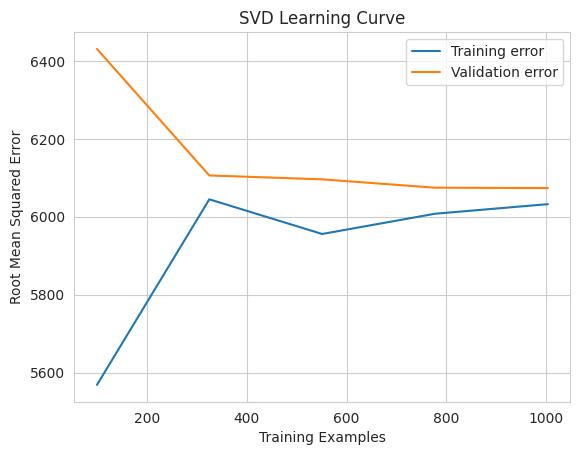

In [178]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(linear, X, y, cv=4, scoring="neg_mean_squared_error")

train_rmse = np.sqrt(-train_scores)
train_scores_mean = train_rmse.mean(axis = 1)
test_rmse = np.sqrt(-test_scores)
test_scores_mean = test_rmse.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.title("SVD Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Root Mean Squared Error")
plt.show()

In [179]:
# Ridge, Lasso, ElasticNet with different alpha values
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor

# K-Fold cross-validation object
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#List of penalty values
alpha_values = [0.0001, 0.01, 0.5, 1.0, 10.0]
for alpha in alpha_values:
    print(f"Regularization alpha={alpha}")

    linear = LinearRegression()
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)

    models = [linear, ridge, lasso, elastic_net]
    model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']

    for model, model_name in zip(models, model_names):
        rmse_scores = []
        r2_scores = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            # Fit the model
            model.fit(X_train_fold, y_train_fold)

            # Make predictions on the validation set
            y_pred = model.predict(X_val_fold)

            # Calculate RMSE and R-squared
            rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
            r2 = r2_score(y_val_fold, y_pred)

            rmse_scores.append(rmse)
            r2_scores.append(r2)

        avg_rmse = np.mean(rmse_scores)
        avg_r2 = np.mean(r2_scores)

        print(f"-> {model_name}:")
        print(f"  Average RMSE = {avg_rmse}")
        print(f"  Average R-squared = {avg_r2}")

Regularization alpha=0.0001
-> Linear Regression:
  Average RMSE = 6145.79340679083
  Average R-squared = 0.7359529656558443
-> Ridge:
  Average RMSE = 6145.793356640733
  Average R-squared = 0.7359529728251688
-> Lasso:
  Average RMSE = 6145.7933758587915
  Average R-squared = 0.7359529686864128
-> Elastic Net:
  Average RMSE = 6145.773982591575
  Average R-squared = 0.7359557809332679
Regularization alpha=0.01
-> Linear Regression:
  Average RMSE = 6145.79340679083
  Average R-squared = 0.7359529656558443
-> Ridge:
  Average RMSE = 6145.788436863252
  Average R-squared = 0.7359536786665579
-> Lasso:
  Average RMSE = 6145.790311590479
  Average R-squared = 0.7359532688851416
-> Elastic Net:
  Average RMSE = 6150.666973200514
  Average R-squared = 0.7356415730422144
Regularization alpha=0.5
-> Linear Regression:
  Average RMSE = 6145.79340679083
  Average R-squared = 0.7359529656558443
-> Ridge:
  Average RMSE = 6145.655604622063
  Average R-squared = 0.7359789873881809
-> Lasso:
  Ave

For most of the alpha values, the r-squared is coming as 0.7 which means that the independent variables have strong effect on dependent variable.

In [180]:
# Initialize a K-Fold cross-validation object
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#List of penalty values
alpha_values = [0.001, 0.01, 0.5, 1.0, 10.0]
for alpha in alpha_values:
    print(f"Regularization alpha={alpha}")

    linear = LinearRegression()
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)

    models = [linear, ridge, lasso, elastic_net]
    model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']

    for model, model_name in zip(models, model_names):
        rmse_scores = []
        r2_scores = []

        for test_index, val_index in kf.split(X_test):
            X_test_fold, X_val_fold = X_test.iloc[test_index], X_test.iloc[val_index]
            y_test_fold, y_val_fold = y_test.iloc[test_index], y_test.iloc[val_index]

            # Fit the model
            model.fit(X_test_fold, y_test_fold)

            # Make predictions on the validation set
            y_pred = model.predict(X_val_fold)

            # Calculate RMSE and R-squared
            rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
            r2 = r2_score(y_val_fold, y_pred)

            rmse_scores.append(rmse)
            r2_scores.append(r2)

        avg_rmse = np.mean(rmse_scores)
        avg_r2 = np.mean(r2_scores)

        print(f"-> {model_name}:")
        print(f"  Average RMSE = {avg_rmse}")
        print(f"  Average R-squared = {avg_r2}")

Regularization alpha=0.001
-> Linear Regression:
  Average RMSE = 6048.2915717786
  Average R-squared = 0.7579691598102367
-> Ridge:
  Average RMSE = 6048.274997381075
  Average R-squared = 0.7579707620254509
-> Lasso:
  Average RMSE = 6048.290915935849
  Average R-squared = 0.7579692205663945
-> Elastic Net:
  Average RMSE = 6046.731463371919
  Average R-squared = 0.7581213309031416
Regularization alpha=0.01
-> Linear Regression:
  Average RMSE = 6048.2915717786
  Average R-squared = 0.7579691598102367
-> Ridge:
  Average RMSE = 6048.126787383506
  Average R-squared = 0.7579851014849143
-> Lasso:
  Average RMSE = 6048.284946461241
  Average R-squared = 0.7579697732447073
-> Elastic Net:
  Average RMSE = 6041.664768756983
  Average R-squared = 0.7587411654158702
Regularization alpha=0.5
-> Linear Regression:
  Average RMSE = 6048.2915717786
  Average R-squared = 0.7579691598102367
-> Ridge:
  Average RMSE = 6042.573776553804
  Average R-squared = 0.7585552031719894
-> Lasso:
  Average 

Computed the RMSE of test data as well.

It shows that both the train and test data dont have much variation in the value of RMSE which also means that the model is comparatively better.

In [181]:
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [182]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7835929767120724

In [183]:
train_score = linear.score(X_train, y_train)
train_score

0.7417255854683333

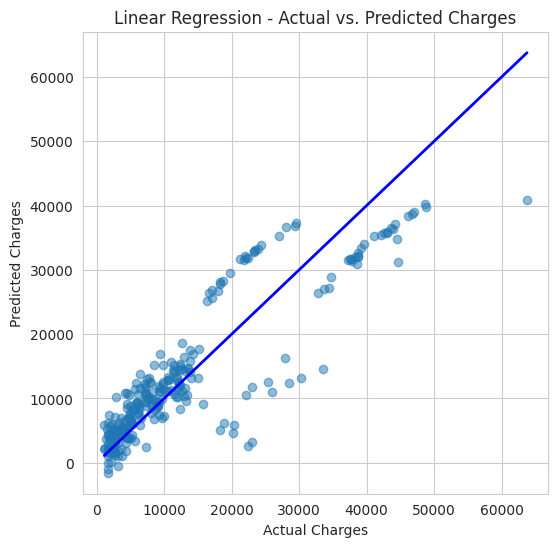

In [184]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression - Actual vs. Predicted Charges")
plt.grid(True)

# Diagonal line to represent perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='blue', linewidth=2)

plt.show()

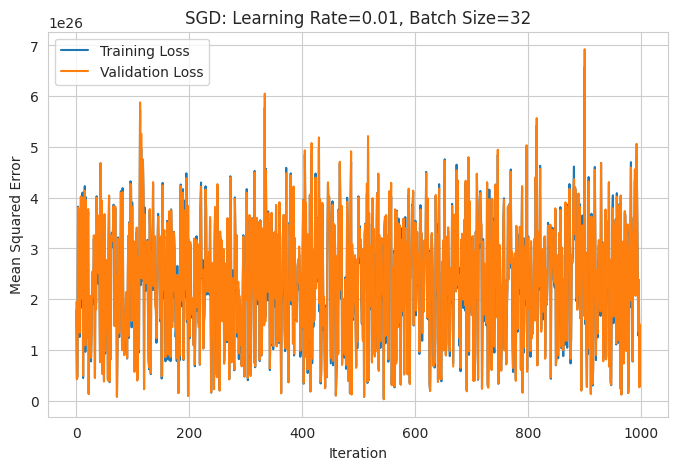

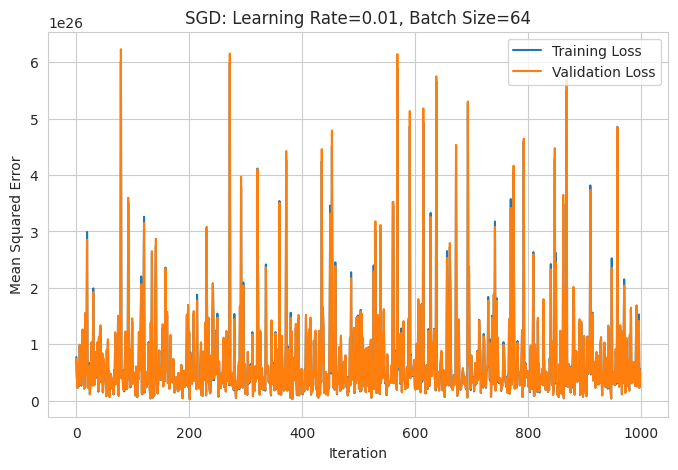

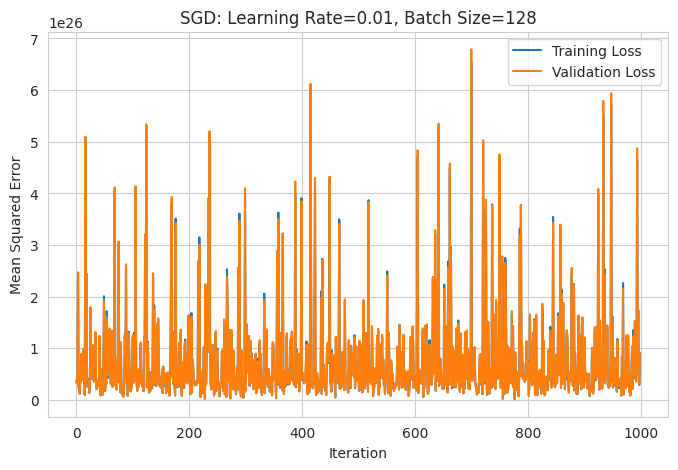

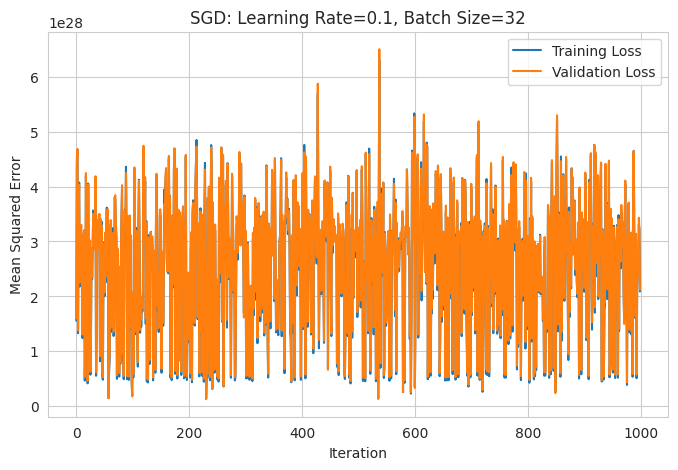

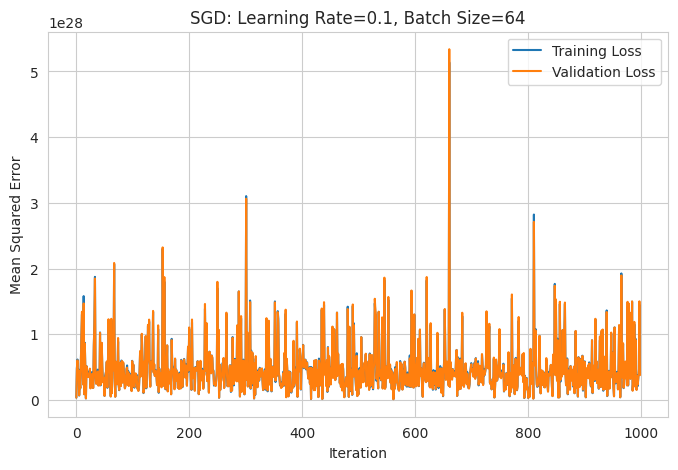

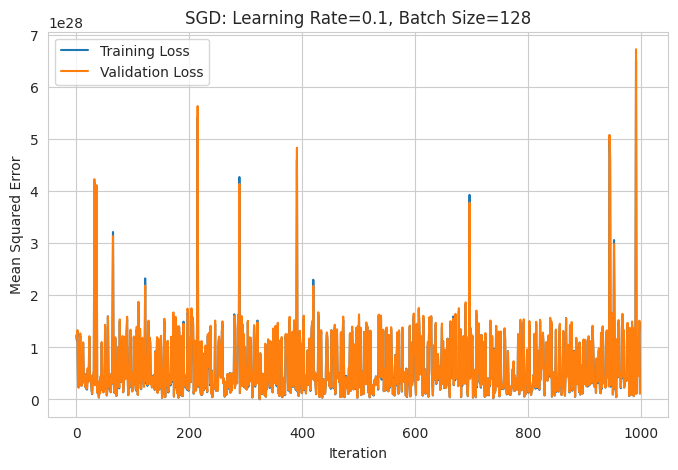

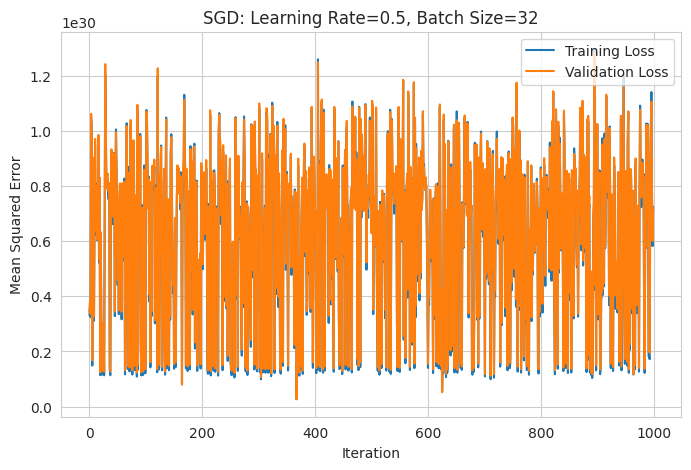

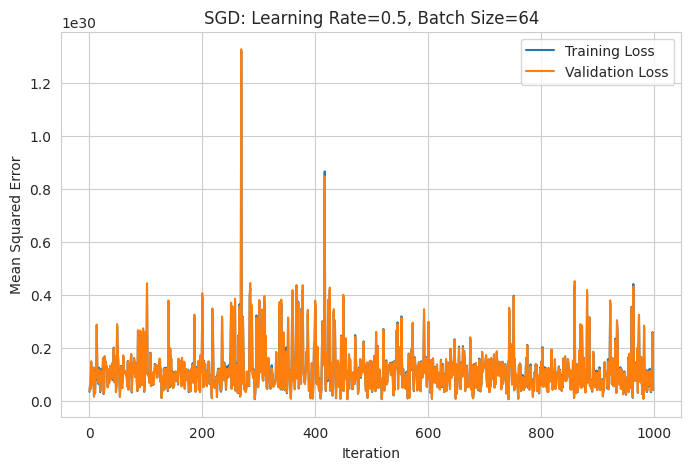

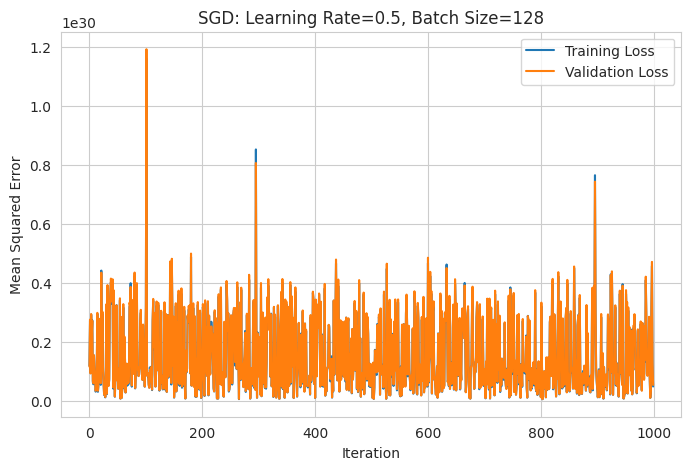

   Learning Rate  Batch Size  Final Training Loss  Final Validation Loss
0           0.01          32         1.464230e+26           1.501135e+26
1           0.01          64         5.612610e+25           5.414762e+25
2           0.01         128         9.068825e+25           8.893154e+25
3           0.10          32         2.090055e+28           2.123263e+28
4           0.10          64         4.083284e+27           3.782697e+27
5           0.10         128         1.153788e+27           1.159826e+27
6           0.50          32         7.252067e+29           7.214959e+29
7           0.50          64         4.020685e+28           4.175325e+28
8           0.50         128         4.928659e+28           5.459526e+28


In [185]:

def train_and_evaluate_sgd(lr, batch_size, n_iterations, X_train, y_train, X_test, y_test):
    sgd = SGDRegressor(
        alpha=0.1,
        learning_rate='constant',
        eta0=lr,
        max_iter=n_iterations,
        tol=1e-3,
        penalty=None,
        random_state=42
    )

    training_losses = []
    validation_losses = []

    for _ in range(n_iterations):
        for batch_start in range(0, len(X_train), batch_size):
            X_batch = X_train[batch_start:batch_start + batch_size]
            y_batch = y_train[batch_start:batch_start + batch_size]
            sgd.partial_fit(X_batch, y_batch)

        # Calculate training loss
        train_loss = mean_squared_error(y_train, sgd.predict(X_train))
        training_losses.append(train_loss)

        # Calculate validation loss
        val_loss = mean_squared_error(y_test, sgd.predict(X_test))
        validation_losses.append(val_loss)

    return training_losses, validation_losses

# Define hyperparameters
learning_rates = [0.01, 0.1, 0.5]
batch_sizes = [32, 64, 128]
n_iterations = 1000

# lists to store results
sgd_results = []

for lr in learning_rates:
    for batch_size in batch_sizes:
        # Train and evaluate SGD
        training_losses, validation_losses = train_and_evaluate_sgd(
            lr, batch_size, n_iterations, X_train, y_train, X_test, y_test
        )

        # Store results
        sgd_results.append({
            'Learning Rate': lr,
            'Batch Size': batch_size,
            'Final Training Loss': training_losses[-1],
            'Final Validation Loss': validation_losses[-1]
        })

        # Plot training and validation loss
        plt.figure(figsize=(8, 5))
        plt.plot(range(n_iterations), training_losses, label='Training Loss')
        plt.plot(range(n_iterations), validation_losses, label='Validation Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.title(f'SGD: Learning Rate={lr}, Batch Size={batch_size}')
        plt.show()

sgd_results_df = pd.DataFrame(sgd_results)
print(sgd_results_df)

# **F**

In [186]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer

def cross_val_polynomial_rmse(model,X, y, degree, cv):

    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    rmse_scores = -cross_val_score(model, X_poly, y, cv=cv, scoring="neg_mean_squared_error")

    return np.mean(rmse_scores)

model = LinearRegression()
polynomial_rmse = cross_val_polynomial_rmse(model,X_train, y_train, degree, cv=4)
print(f"Cross-validated RMSE: {polynomial_rmse}")

Cross-validated RMSE: 37158566.222283915


In [187]:
from sklearn.pipeline import make_pipeline

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)


model = LinearRegression()
model.fit(X_train_poly, y_train)


X_test_poly = poly.transform(X_test)
y_pred_poly = model.predict(X_test_poly)

In [188]:
r_squared_poly = r2_score(y_test, y_pred_poly)
r_squared_poly

0.8660139771417649

In [189]:
poly_train_score = model.score(X_train_poly, y_train)
poly_train_score

0.8416273055533456

In [190]:
from sklearn.linear_model import Ridge

alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
poly_ridge_rmse_values = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge_rmse = cross_val_polynomial_rmse(ridge, X_train, y_train, 3, cv=4)
    poly_ridge_rmse_values.append(ridge_rmse)

poly_ridge_rmse_values

[25413739.456029557,
 25344195.054925434,
 25281410.40109252,
 25267624.05597994,
 25256375.91273997]

In [191]:
from sklearn.linear_model import Lasso

alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
poly_lasso_rmse_values = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter = 10000)
    lasso_rmse = cross_val_polynomial_rmse(lasso, X_train, y_train, 3, cv=4)
    poly_lasso_rmse_values.append(lasso_rmse)

poly_lasso_rmse_values

[25407051.395779543,
 25378563.575387213,
 25294960.665067382,
 25217760.44871375,
 25237461.9885682]

In [192]:
from sklearn.linear_model import ElasticNet

alpha_values = [0.01, 0.1, 0.5, 1.0, 10.0]
poly_elastic_net_rmse_values = []

for alpha in alpha_values:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_rmse = cross_val_polynomial_rmse(elastic_net, X_train, y_train, 3, cv=4)
    poly_elastic_net_rmse_values.append(elastic_net_rmse)

poly_elastic_net_rmse_values

[25240621.010847684,
 25233167.841193557,
 25093395.592360567,
 25043560.688559912,
 24967178.71835328]

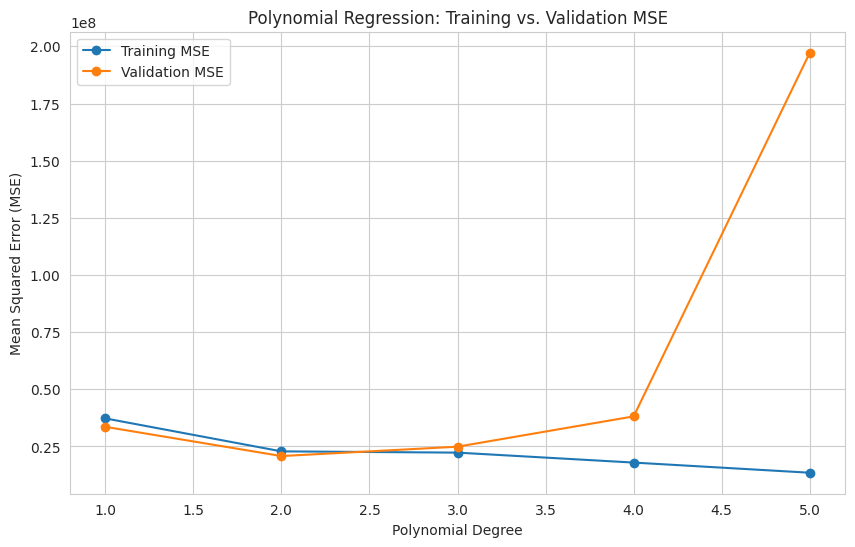

In [193]:
train_mse = []
val_mse = []

# Define a range of polynomial degrees to explore
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Initialize and fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on training and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate MSE for training and validation sets
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot training and validation MSE vs. polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, label='Training MSE', marker='o')
plt.plot(degrees, val_mse, label='Validation MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Polynomial Regression: Training vs. Validation MSE')
plt.legend()
plt.grid(True)
plt.show()

In [194]:
train_mse


[37277681.70201866,
 22858504.60479734,
 22303712.769807525,
 17950176.699061535,
 13513284.27891929]

In [195]:
val_mse

[33596915.85136147,
 20801160.086368766,
 24902392.689545266,
 38158498.39365945,
 197218096.26408967]

We can say that the data follows a non linear pattern as the polynomial score (84%) is better than linear score (74%). Hence, polynomial regression is better model for this case.




References

dataset - https://www.kaggle.com/datasets/mirichoi0218/insurance/data

https://www.statology.org/linear-regression/

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

https://chat.openai.com/ (for SGD for SGD and also for few errors in the code)

https://medium.com/@creatrohit9/lasso-ridge-elastic-net-regression-a-complete-understanding-2021-b335d9e8ca3